In [1]:
import numpy as np
import pandas as pd
import seaborn as sc
import matplotlib.pyplot as plt
#%matplotlib inline

In [ ]:
df = pd.read_csv('path/to/your/dataset.csv')

In [5]:
df .shape

(569, 33)

In [ ]:
df.head(5)

benign 357
malignant 212


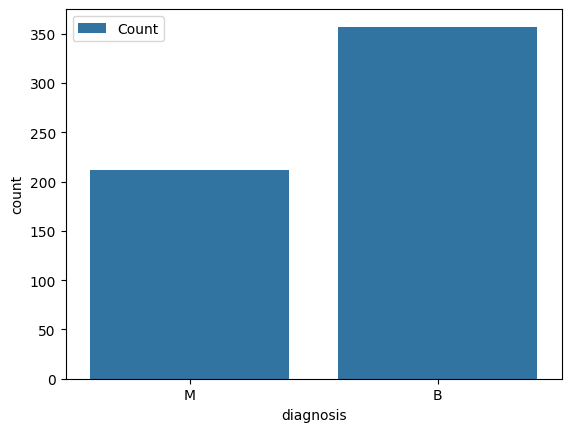

In [7]:
ax = sc.countplot(x='diagnosis', data=df,label='Count')
B,M =df['diagnosis'].value_counts()
print("benign",B)
print("malignant",M)

In [8]:
del df['Unnamed: 32']

In [9]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
X = df.drop('diagnosis',axis = 1)
Y = df['diagnosis']

In [11]:
X.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 100)

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# Install tensorflow package
#%pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classifier =Sequential()
classifier.add(Dense(units = 16, kernel_initializer = 'uniform',activation = 'relu',input_dim = 31))
classifier.add(Dense(units = 8,kernel_initializer = 'uniform',activation = 'relu'))
classifier.add(Dense(units =1,kernel_initializer= 'uniform',activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['Accuracy'])

In [ ]:
classifier.fit(X_train,Y_train,batch_size = 100,epochs = 150)

In [ ]:
prediction = classifier.predict(X_test)
prediction = (prediction >=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction)

sc.heatmap(cm,annot=True)
plt.savefig('h.png')

## K FOLD CROSS VALIDATION

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def built_classifier():
    classifier =Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform',activation = 'relu',input_dim = 31))
    classifier.add(Dense(units = 16,kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units =1,kernel_initializer= 'uniform',activation = 'sigmoid'))
    classifier.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['Accuracy'])
    return classifier
classifier = kerasClassifier(built_classifier,batch_size =100,epochs = 100)
accuracies = cross_val_score(estimator= classifier,X= X_train,Y = Y_train, cv = 10,n_jobs = -1)

In [ ]:
accuracies

In [ ]:
mean = accuracies.mean()


In [ ]:
variance = accuracies.std()

## DROPOUT IN NEURAL NETWORK

In [ ]:
from tensorflow.keras.layers import Dropout
classifier =Sequential()
classifier.add(Dense(units = 16, kernel_initializer = 'uniform',activation = 'relu',input_dim = 31))
classifier.add(Dropout(rate = 0.1))

classifier.add(Dense(units = 16,kernel_initializer = 'uniform',activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units =1,kernel_initializer= 'uniform',activation = 'sigmoid'))

classifier.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['Accuracy'])

In [ ]:
classifier.fit(X_train,Y_train,batch_size = 100,epochs = 150)

In [ ]:
prediction = classifier.predict(X_test)
prediction = (prediction >=0.5)

### PARAMETER TUNING

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from keras.layers import Dense

def built_classifier(optimizer = "adam"):
    classifier = Sequential()
    classifier.add(Dense(units = 16,kernel_initializer = 'uniform', activation = "relu",input_dim = 31))
    classifier.add(Dense(units = 16,kernel_initializer = 'uniform',activation = "relu"))
    classifier.add(Dense(units = 1,kernel_initializer = 'uniform',activation = "sigmoid"))
    classifier.compile(optimizer =optimizer ,loss = 'binary_crossentropy',metrics = ['accuracy'])
    return classifier
classifier = kerasClassifier(build_fn = built_classifier)
parameters = {'batch_size':[100,150],'epochs':[100,200],'optimizers':['adam,rmsprop']}

grid_search = GridSearchCV(estimator = classifier,param_grid = parameters,scoring = 'accuracy',cv = 10)

grid_search = grid_search.fit(X_train,Y_train)


In [ ]:
best_parameters = grid_search.best_params_

In [ ]:
best_parameters =grid_search.best_score_